***STEPS FOR QUERYING STRUCTURAL VARIANT VCF FILE, GETTING THE INTERSECT WITH GOOD PLOTS, AND PLOTTING THE PCA***

Query the Smoove .vcf file for all SV calls with alternate genotypes

In [1]:
#%%bash
#VCF=sparrow_all.smoove.square.vcf.gz

#bcftools query -f '%CHROM\t%POS\t%END\t%ALT[\t%GT]\n' ${VCF} | sort -k1,1 -k2,2n | grep CM | grep -v '\[' | grep -v '\]' | sed 's/<DEL>/DEL/g' | sed 's/<DUP>/DUP/g' | sed 's/<INV>/INV/g' > SV_altgenos.bed

STEP 1 - filter out only the Good calls in the report:

Filter for number of SVs in report by desired person, reorganize columns for order chrom, start pos,stop pos, SV type:

***Filter for Yes's for each of the four curators***

First set the file names and curator names as variables

Then extract all Yes's from the raw report

In [2]:
%%bash
RAWDEL=raw_report_del_dec23_2020.tsv
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish
#set the SV class
SV=DEL

#Extract all Yes's
cat ${RAWDEL} | grep "${CUR1}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR1}.tsv
cat ${RAWDEL} | grep "${CUR2}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR2}.tsv
cat ${RAWDEL} | grep "${CUR3}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR3}.tsv
cat ${RAWDEL} | grep "${CUR4}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR4}.tsv

Process the .bed file to extract genotype information for each SV call

In [3]:
%%bash
#set the SV class
SV=DEL
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish

cat yes_${SV}_${CUR1}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR1}_processed.bed 
cat yes_${SV}_${CUR2}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR2}_processed.bed 
cat yes_${SV}_${CUR3}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR3}_processed.bed 
cat yes_${SV}_${CUR4}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR4}_processed.bed 

First take intersect off all four curators' validated SVs

In [4]:
%%bash 
#set the SV class
SV=DEL
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish

bedops --intersect yes_${SV}_${CUR1}_processed.bed yes_${SV}_${CUR2}_processed.bed yes_${SV}_${CUR3}_processed.bed yes_${SV}_${CUR4}_processed.bed  > yesallintersect.bed

Now intersect with .bed file extracted from original Smoove .vcf file

In [5]:
%%bash 
#set the SV class
SV=DEL
CUR1=gabriel
CUR2=alicia
CUR3=erik
CUR4=hamish

bedtools intersect -f 0.9 -r -a SV_altgenos.bed -b yesallintersect.bed  > yesallintersect.txt

***Change format of intersected bedfile, repeat this to join 3 first columns with tabs***

In [6]:
cat yesallintersect.txt | sed 's/0\/0/0/g' | sed 's/0\/1/1/g' | sed 's/1\/1/2/g'| sed 's/.\/\./0/g' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' > yesallintersect_edit.txt 

***Convert to .csv for export to Python, to tranpose matrix***

In [7]:
cat yesallintersect_edit.txt | sed 's/\t/,/'g > yesallintersect_edit.csv

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv("yesallintersect_edit.csv", header = None, index_col = None)

df_T = df.transpose()

df_T.to_csv("yesallintersect_T.csv", index = False)

Remove first line

In [9]:
%%bash
sed -i -e 1,1d yesallintersect_T.csv 

***Now plot in Python!***

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
#df = pd.read_csv("rejecteddels_all_T.csv")
df = pd.read_csv("yesallintersect_T.csv")
hs = pd.read_csv("HS.sample.csv")
df

,CM004525.1_450632_450686_DEL,CM004525.1_2793450_2793535_DEL,CM004525.1_3367262_3367328_DEL,CM004525.1_5558809_5559097_DEL,CM004525.1_7403900_7405237_DEL,CM004525.1_7522591_7522670_DEL,CM004525.1_9075437_9075557_DEL,CM004525.1_9813191_9813303_DEL,CM004525.1_10956079_10956149_DEL,CM004525.1_11653151_11653211_DEL,...,CM004549.1_2440750_2440870_DEL,CM004550.1_246509_247134_DEL,CM004550.1_1236277_1236348_DEL,CM004550.1_1890650_1890710_DEL,CM004550.1_3727001_3727053_DEL,CM004550.1_4313941_4314149_DEL,CM004552.1_1630829_1630907_DEL,CM004553.1_2614567_2614634_DEL,CM004553.1_2844948_2845034_DEL,CM004554.1_868673_869052_DEL
0,0,2,2,2,1,1,0,2,0,1,...,2,1,1,0,0,1,1,0,0,1
1,0,1,0,0,1,2,1,1,0,2,...,1,2,0,0,0,1,0,2,0,0
2,0,0,0,1,1,2,0,1,1,2,...,0,0,0,0,1,2,0,2,0,0
3,1,0,0,0,1,0,0,0,0,2,...,2,0,0,0,2,1,0,2,0,0
4,0,1,2,1,0,0,0,0,1,1,...,0,0,0,0,1,2,1,0,1,1
5,2,0,2,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,2,2
6,0,0,2,1,0,0,0,1,0,2,...,0,0,0,0,0,0,0,2,0,1
7,1,0,1,1,1,2,1,1,0,0,...,1,0,0,0,0,2,1,2,2,0
8,0,1,2,1,1,2,1,0,1,0,...,2,1,1,0,0,2,0,2,0,1
9,2,2,0,1,0,0,0,2,0,1,...,0,2,0,1,2,0,0,0,2,0


In [12]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df


In [13]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

components 

array([[-2.45170485, -0.77207755],
       [-2.82628714, -0.42239391],
       [ 0.25463184,  1.58143789],
       [-1.2443312 ,  1.82016314],
       [-0.04992371, -2.56396077],
       [-2.65373984, -4.24528027],
       [-2.03707662, -0.42609608],
       [-6.685758  , 14.33685225],
       [-7.58637817, 14.71343813],
       [-3.60218764, -1.71794888],
       [-3.73957956, -2.73253656],
       [16.90257878,  6.39261464],
       [ 0.34353102, -1.18452414],
       [ 2.4284577 , -5.8424096 ],
       [13.20970769,  0.17474961],
       [-2.21405102, -2.86238236],
       [-1.15616578, -2.09631423],
       [-4.65650485, -3.31539327],
       [-2.44634682, -2.60207902],
       [ 1.92531028, -5.72048214],
       [11.78724542,  2.98626227],
       [-0.68251147, -7.66951535],
       [ 0.27035226, -8.99342826],
       [ 0.79263504, -6.76389809],
       [-4.3009938 , -5.94815994],
       [-2.10256917, -6.89095384],
       [19.05655214,  5.78247551],
       [-3.41781457,  0.89950487],
       [ 9.53763255,

In [14]:
pcomp = pd.DataFrame(components)

merged = pd.concat([pcomp, hs], axis=1)

merged['popinfo']
PC1 = merged.iloc[:, 0]
PC2 = merged.iloc[:, 1]

merged_n = merged.rename(columns={0: 'PC1'})
merged_new = merged_n.rename(columns={1: 'PC2'})

merged2 =  merged_new.rename(columns={'popinfo': 'populations'})

In [15]:
merged2

,PC1,PC2,populations
0,-2.451705,-0.772078,ALTA
1,-2.826287,-0.422394,ALTA
2,0.254632,1.581438,HELG
3,-1.244331,1.820163,TRON
4,-0.049924,-2.563961,TRON
5,-2.653740,-4.245280,TRON
6,-2.037077,-0.426096,HELG
7,-6.685758,14.336852,PASV
8,-7.586378,14.713438,PASV
9,-3.602188,-1.717949,TRON


In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

	
# Set theme
sns.set_style('darkgrid')

colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#EE99AC',  # Fairy
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
	

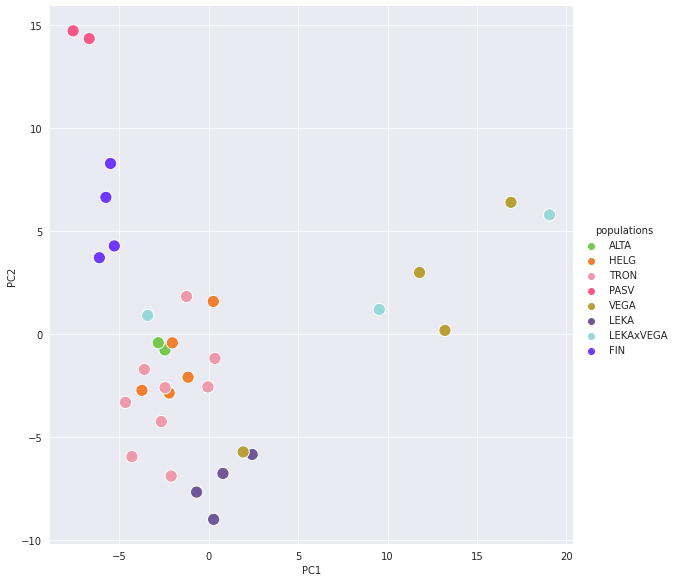

In [17]:
from matplotlib import pyplot
import seaborn


sns.relplot(x="PC1", y="PC2", data=merged2, hue="populations", palette=colours, s=(150),height=8, aspect=1)